### CS559 - Homework #3

**Author**: Sid Bhatia

**Date**: October 1st, 2024

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. In Suk Jang

#### 1. Neural Networks [60 pts]

Consider a data point $\mathbf{x} = [0.7, 0.1, 0.3, 0.5]$ and $y = 1.5$. In this experiment, we will implement a simple neural network algorithm. In the lecture, the data point was used to observe the computational process of a neural network with a single hidden layer consisting of two neurons.

a. [5pts] Perform a forward propagation when the network with the one hidden layer of two neurons where $ \mathbf{W}^{(1)} = \begin{bmatrix} 0.16 & 0.02 & 0.63 & 0.36 \\ 0.16 & 0.25 & 0.22 & 0.29 \end{bmatrix} $ and $ \mathbf{W}^{(2)} = \begin{bmatrix} 0.05 \\ 0.33 \end{bmatrix} $. The predicted value $\hat{h}$ should be $0.139$ if the learning rate $\eta = 0.1$ is used. However, it can be changed if needed.

In [67]:
import numpy as np

x = np.array([0.7, 0.1, 0.3, 0.5])

W1 = np.array([
    [0.16, 0.02, 0.63, 0.36],
    [0.16, 0.25, 0.22, 0.29]
])

W2 = np.array([0.05, 0.33])

z1 = np.dot(W1, x)   
a1 = z1              

z2 = np.dot(W2, a1)  
hat_h = z2           

print(f"Predicted value hat_h = {hat_h:.4f}")

Predicted value hat_h = 0.1390


b. [5 pts] Perform the backpropagation. Report the updated $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$.

In [68]:
y = 1.5

eta = 0.1

delta_output = hat_h - y

dE_dW2 = delta_output * a1

delta_hidden = delta_output * W2

dE_dW1 = np.outer(delta_hidden, x)

W2_new = W2 - eta * dE_dW2
W1_new = W1 - eta * dE_dW1

print("\nUpdated W1:")
print(W1_new)

print("\nUpdated W2:")
print(W2_new)


Updated W1:
[[0.16476354 0.02068051 0.63204152 0.36340252]
 [0.19143933 0.25449133 0.233474   0.31245666]]

Updated W2:
[0.11573678 0.37736315]


c. [10pts] Repeat the forward and backpropagation to optimize $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$. Predict $y$ using the optimized $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$.

Epoch 10/100, Loss: 0.1424
Epoch 20/100, Loss: 0.0006
Epoch 30/100, Loss: 0.0000
Epoch 40/100, Loss: 0.0000
Epoch 50/100, Loss: 0.0000
Epoch 60/100, Loss: 0.0000
Epoch 70/100, Loss: 0.0000
Epoch 80/100, Loss: 0.0000
Epoch 90/100, Loss: 0.0000
Epoch 100/100, Loss: 0.0000

Optimized predicted value hat_h = 1.5000

Optimized W1:
[[0.43430972 0.0591871  0.74756131 0.55593552]
 [0.63572754 0.31796108 0.42388323 0.62980538]]

Optimized W2:
[0.73091145 0.98639789]


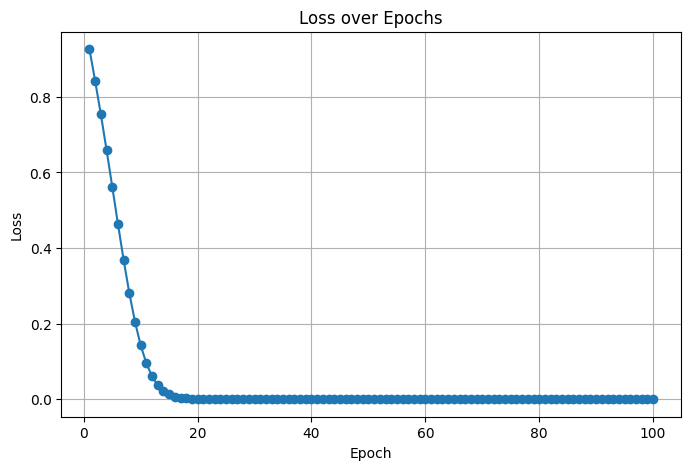

In [69]:
import numpy as np
import matplotlib.pyplot as plt

epochs = 100

loss_history = []

for epoch in range(epochs):

    z1 = np.dot(W1, x)   
    a1 = z1              

    z2 = np.dot(W2, a1)  
    hat_h = z2           

    loss = 0.5 * (hat_h - y) ** 2
    loss_history.append(loss)

    delta_output = hat_h - y

    dE_dW2 = delta_output * a1  

    delta_hidden = delta_output * W2 

    dE_dW1 = np.outer(delta_hidden, x)  
   
    W2 -= eta * dE_dW2
    W1 -= eta * dE_dW1

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")


z1_opt = np.dot(W1, x)
a1_opt = z1_opt

z2_opt = np.dot(W2, a1_opt)
hat_h_opt = z2_opt

print(f"\nOptimized predicted value hat_h = {hat_h_opt:.4f}")

print("\nOptimized W1:")
print(W1)

print("\nOptimized W2:")
print(W2)

# Plot the loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

d. [10pts] Consider the same network as (c) except that a non-linear activation is applied. Derive analytical solution of the error matrices, $\bm{\delta}^{(2)}$ and $\bm{\delta}^{(1)}$, when a sigmoid function is applied as a non-linear activation function between the input and hidden layers.

To derive the error matrices $\bm{\delta}^{(2)}$ and $\bm{\delta}^{(1)}$ when a sigmoid activation function is applied between the input and hidden layers, we follow the standard backpropagation procedure for neural networks with non-linear activations.

##### Forward Propagation

Compute the input to the hidden layer:

$$
\mathbf{z}^{(1)} = \mathbf{W}^{(1)} \mathbf{x}
$$

Apply the sigmoid activation function to obtain the hidden layer activations:

$$
\mathbf{a}^{(1)} = \sigma(\mathbf{z}^{(1)}) = \frac{1}{1 + e^{-\mathbf{z}^{(1)}}}
$$

Compute the input to the output layer (assuming linear activation at the output):

$$
z^{(2)} = \mathbf{W}^{(2)} \mathbf{a}^{(1)}
$$

Compute the output activation (since activation is linear):

$$
a^{(2)} = z^{(2)}
$$

##### Backpropagation

Compute the error term at the output layer:

The derivative of the loss with respect to $z^{(2)}$ is:

$$
\delta^{(2)} = \frac{\partial E}{\partial z^{(2)}} = \frac{\partial E}{\partial a^{(2)}} \cdot \frac{\partial a^{(2)}}{\partial z^{(2)}}
$$

Since $E = \dfrac{1}{2} (a^{(2)} - y)^2$ and $a^{(2)} = z^{(2)}$, we have:
$$
\frac{\partial E}{\partial a^{(2)}} = a^{(2)} - y
$$

$$
\frac{\partial a^{(2)}}{\partial z^{(2)}} = 1
$$
  
Therefore:

$$
\delta^{(2)} = a^{(2)} - y
$$

Compute the error term at the hidden layer:
    
The error term for the hidden layer neurons is:
$$
\bm{\delta}^{(1)} = \left( \mathbf{W}^{(2)} \right)^\top \delta^{(2)} \odot \sigma'\left( \mathbf{z}^{(1)} \right)
$$
   
Here, $\odot$ denotes element-wise multiplication, and $\sigma'\left( \mathbf{z}^{(1)} \right)$ is the derivative of the sigmoid function evaluated at $\mathbf{z}^{(1)}$.
    
Compute the derivative of the sigmoid activation function:
    
The derivative of the sigmoid function is:

$$
\sigma'(z) = \sigma(z) \left( 1 - \sigma(z) \right)
$$

Therefore:
$$
\sigma'\left( \mathbf{z}^{(1)} \right) = \mathbf{a}^{(1)} \odot \left( 1 - \mathbf{a}^{(1)} \right)
$$
    
Substitute back into $\bm{\delta}^{(1)}$:

$$
\bm{\delta}^{(1)} = \left( \mathbf{W}^{(2)} \right)^\top \delta^{(2)} \odot \left( \mathbf{a}^{(1)} \odot \left( 1 - \mathbf{a}^{(1)} \right) \right)
$$

##### Summary of the Error Matrices

Output Layer Error Term:

$$
\delta^{(2)} = a^{(2)} - y
$$

Hidden Layer Error Term:
$$
\bm{\delta}^{(1)} = \left( \mathbf{W}^{(2)} \right)^\top \delta^{(2)} \odot \left( \mathbf{a}^{(1)} \odot \left( 1 - \mathbf{a}^{(1)} \right) \right)
$$

e. [15pts] Predict $y$ for (d). Visualize the convergence of error and compare it to the result in (c). Explain which one converged faster.

Epoch 10/100, Loss: 0.005527
Epoch 20/100, Loss: 0.000558
Epoch 30/100, Loss: 0.000055
Epoch 40/100, Loss: 0.000005
Epoch 50/100, Loss: 0.000001
Epoch 60/100, Loss: 0.000000
Epoch 70/100, Loss: 0.000000
Epoch 80/100, Loss: 0.000000
Epoch 90/100, Loss: 0.000000
Epoch 100/100, Loss: 0.000000

Optimized predicted value hat_h = 1.499997

Optimized W1:
[[0.46707701 0.06386814 0.76160443 0.57934072]
 [0.67687201 0.32383886 0.44151657 0.65919429]]

Optimized W2:
[0.91910024 1.18081363]


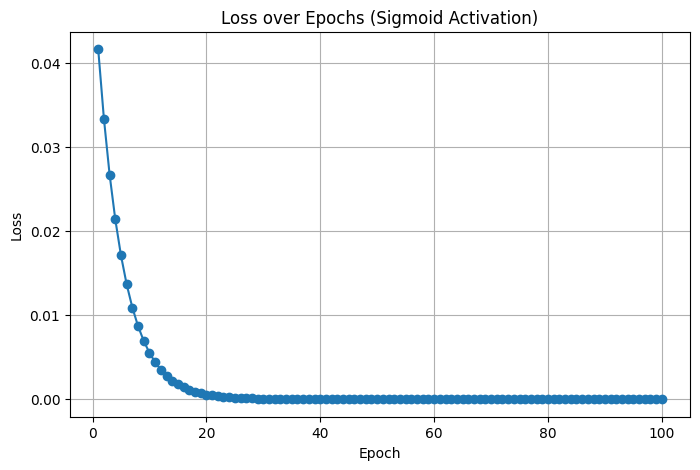

In [70]:
loss_history = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

for epoch in range(epochs):
    z1 = np.dot(W1, x)          
    a1 = sigmoid(z1)            

    z2 = np.dot(W2, a1)         
    a2 = z2                     
    hat_h = a2                 

    loss = 0.5 * (hat_h - y) ** 2
    loss_history.append(loss)

    delta_output = hat_h - y

    dE_dW2 = delta_output * a1

    delta_hidden = (W2 * delta_output) * sigmoid_derivative(a1)

    dE_dW1 = np.outer(delta_hidden, x)

    W2 -= eta * dE_dW2
    W1 -= eta * dE_dW1

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

z1_opt = np.dot(W1, x)
a1_opt = sigmoid(z1_opt)

z2_opt = np.dot(W2, a1_opt)
hat_h_opt = z2_opt

print(f"\nOptimized predicted value hat_h = {hat_h_opt:.6f}")

print("\nOptimized W1:")
print(W1)

print("\nOptimized W2:")
print(W2)

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.title('Loss over Epochs (Sigmoid Activation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In part (c), using a linear activation function in the hidden layer, the network converged faster. The loss decreased rapidly, reaching near zero well before 100 epochs. The reason for this is that linear activation functions do not introduce any non-linearities, making the optimization problem convex for a single data point. The gradients are straightforward, and the network can adjust the weights directly to fit the data.

In this current part, with the sigmoid activation function, the network took more epochs to reduce the loss significantly. The reason for this is that the sigmoid function introduces non-linearities, causing the gradients to be smaller (due to the derivative of the sigmoid function being less than 1). This results in slower updates to the weights, and the possibility of vanishing gradients can make training slower.

f. [15pts] Extend the network further by increasing the number of hidden layers and neurons on hidden layers. The forward propagation can be summarized as follows:


$$
h(\mathbf{x}) = a^{(3)} = \mathbf{W}^{(3)}\mathbf{z}^{(2)} = \mathbf{W}^{(3)}(\sigma(\mathbf{W}^{(2)}\mathbf{a}^{(2)})) = \mathbf{W}^{(3)} \left(\sigma(\mathbf{W}^{(2)}(\sigma(\mathbf{W}^{(1)}\mathbf{x})))\right)
$$

The dimension of $\mathbf{W}^{(1)}$, $\mathbf{W}^{(2)}$, and $\mathbf{W}^{(3)}$ must not exceed $7 \times 7$. Predict $y$.

Epoch 10/100, Loss: 0.2119
Epoch 20/100, Loss: 0.0179
Epoch 30/100, Loss: 0.0012
Epoch 40/100, Loss: 0.0001
Epoch 50/100, Loss: 0.0000
Epoch 60/100, Loss: 0.0000
Epoch 70/100, Loss: 0.0000
Epoch 80/100, Loss: 0.0000
Epoch 90/100, Loss: 0.0000
Epoch 100/100, Loss: 0.0000

Optimized predicted value hat_h = 1.5000


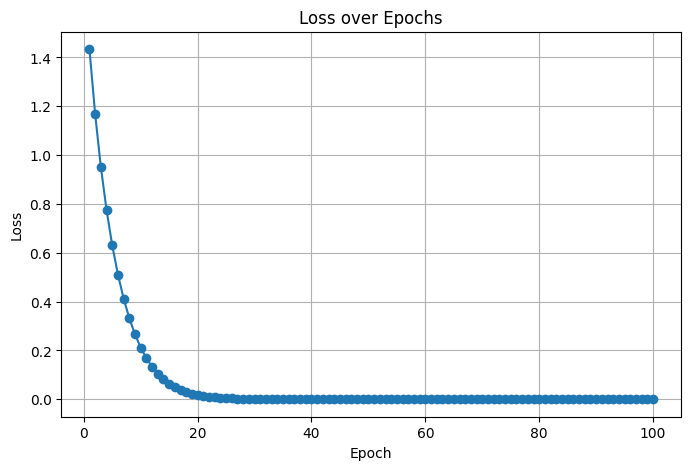

In [71]:
np.random.seed(42)

# Weights from input layer to hidden layer 1 (size: 5 x 4)
W1 = np.random.uniform(-1, 1, (5, 4))

# Weights from hidden layer 1 to hidden layer 2 (size: 5 x 5)
W2 = np.random.uniform(-1, 1, (5, 5))

# Weights from hidden layer 2 to output layer (size: 1 x 5)
W3 = np.random.uniform(-1, 1, (1, 5))

loss_history = []

for epoch in range(epochs):

    z1 = np.dot(W1, x)            
    a1 = sigmoid(z1)              
    
    z2 = np.dot(W2, a1)
    a2 = sigmoid(z2)
    

    z3 = np.dot(W3, a2)
    a3 = z3
    hat_h = a3[0]
    
    loss = 0.5 * (hat_h - y) ** 2
    loss_history.append(loss)
    
    delta3 = hat_h - y
    
    dE_dW3 = delta3 * a2.reshape(1, -1)
    
    delta2 = (W3.T * delta3).reshape(-1) * sigmoid_derivative(a2)
    
    dE_dW2 = np.outer(delta2, a1)
    
    delta1 = (W2.T @ delta2) * sigmoid_derivative(a1)
    
    dE_dW1 = np.outer(delta1, x)
    
    W3 -= eta * dE_dW3
    W2 -= eta * dE_dW2
    W1 -= eta * dE_dW1
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

z1 = np.dot(W1, x)
a1 = sigmoid(z1)

z2 = np.dot(W2, a1)
a2 = sigmoid(z2)

z3 = np.dot(W3, a2)
hat_h = z3[0]

print(f"\nOptimized predicted value hat_h = {hat_h:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()